In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def cluster_olustur(cluster_sayisi,veriler,metot="random_ornek",seed=None):
    if type(seed) == int:
        random.seed(seed)
        np.random.seed(seed)
    else:
        random.seed()
        np.random.seed()
    
    features_min = df.min().values
    features_max = df.max().values
    clusters = np.empty((cluster_sayisi,veriler.shape[1]),np.float32)
    if metot == "random_uzay":
        for i in range(veriler.shape[1]):
            clusters[:,i] = np.random.randint(features_min[i],features_max[i],cluster_sayisi)
    elif metot == "random_ornek":
        clusters = veriler.iloc[np.random.permutation(veriler.shape[0])[:cluster_sayisi],:].copy().values
    return clusters

In [3]:
def mesafe_hesapla(ornek,cluster):
    return np.sqrt(np.sum((ornek-cluster)**2,axis=1));

In [4]:
def cluster_centroid_bul(veriler,veriler_cluster,clusterlar):
    yeni_clusterlar= np.empty(clusterlar.shape,np.float32)
    for cluster_indis in range(len(clusterlar)):
        veriler_cluster_i = veriler[veriler_cluster==cluster_indis]
        
        #aslında doğru olan kümenin içinde hiçbir eleman yoksa ya kümenin silinmesi ya da algoritmanın baştan çalıştırılması gerekli.
        #bu kodda bu özellik yok
        orta_nokta = np.sum(veriler_cluster_i,axis=0) / veriler_cluster_i.shape[0]
        yeni_clusterlar[cluster_indis] = orta_nokta
        
    return yeni_clusterlar

In [5]:
def loss_hesapla(veriler,veriler_cluster,clusterlar):
    loss = 0
    for cluster_indis in range(len(clusterlar)):
        veriler_cluster_i = veriler[veriler_cluster==cluster_indis]
        cluster_i = clusterlar[cluster_indis]
        
        loss += mesafe_hesapla(veriler_cluster_i,cluster_i).sum()
    return loss/veriler.shape[0]

In [6]:
def KMeans_benim(cluster_sayisi,data,init="random_ornek",seed=None):
    clusters = cluster_olustur(cluster_sayisi,data,init,seed)
    converge = False
    loss = -1
    for i in range(iterasyon):
        uzakliklar_temp = np.empty((data.shape[0],cluster_sayisi),np.float32)
        for cluster_indis,cluster in enumerate(clusters):
            uzakliklar_temp[:,cluster_indis] = mesafe_hesapla(df.values,cluster)
        verilerin_atandigi_kumeler = uzakliklar_temp.argmin(axis=1)
        clusters = cluster_centroid_bul(data.values,verilerin_atandigi_kumeler,clusters)
        loss_temp = loss_hesapla(data.values,verilerin_atandigi_kumeler,clusters)
        if(loss_temp == loss):
            print("Converge oldu")
            converge = True
            break
        loss = loss_temp
        print(f"{i+1}.iterasyon, Loss = {loss}")

    if not converge:
        print("Uyarı! Algoritma yakınsayamadı.")
        
    return loss,clusters,verilerin_atandigi_kumeler

In [7]:
df = pd.read_csv("Countries_exercise.csv")
df.drop("name",axis=1,inplace=True)
df.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [8]:
iterasyon = 15
cluster_sayisi = 8

In [9]:
loss,clusters,verilere_atanan_clusterlar = KMeans_benim(cluster_sayisi,df,"random_ornek")

1.iterasyon, Loss = 21.555873333293935
2.iterasyon, Loss = 19.592178537957952
3.iterasyon, Loss = 19.32627312760228
4.iterasyon, Loss = 19.228220765559648
5.iterasyon, Loss = 19.137128865703225
6.iterasyon, Loss = 18.985468963538143
7.iterasyon, Loss = 18.911278272860027
8.iterasyon, Loss = 18.86368846292769
9.iterasyon, Loss = 18.847253521724085
10.iterasyon, Loss = 18.826464429050716
11.iterasyon, Loss = 18.794840509928314
12.iterasyon, Loss = 18.792558839870054
Converge oldu


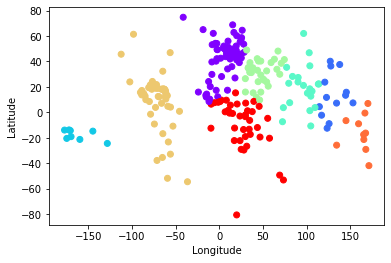

In [10]:
plt.scatter(df["Longitude"],df["Latitude"],c=verilere_atanan_clusterlar,cmap="rainbow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### İdeal Cluster Sayısının Seçilmesi

In [11]:
wcss_list = list()
for i in range(1,10):
    print("="*40)
    print(f"{i} tane cluster için:")
    loss,clusters,verilere_atanan_clusterlar = KMeans_benim(i,df,"random_ornek")
    wcss_list.append(loss)

1 tane cluster için:
1.iterasyon, Loss = 63.878476735920415
Converge oldu
2 tane cluster için:
1.iterasyon, Loss = 49.05266307522141
2.iterasyon, Loss = 49.09204879463406
3.iterasyon, Loss = 49.14388881047871
4.iterasyon, Loss = 49.22440773614558
5.iterasyon, Loss = 49.24603838247415
6.iterasyon, Loss = 49.19949923124321
7.iterasyon, Loss = 49.10337602033716
8.iterasyon, Loss = 49.04378032133128
9.iterasyon, Loss = 49.00900068577542
10.iterasyon, Loss = 48.90472908085505
11.iterasyon, Loss = 48.76166619454442
12.iterasyon, Loss = 48.33702340557526
13.iterasyon, Loss = 47.612190886390245
14.iterasyon, Loss = 46.341747729739104
15.iterasyon, Loss = 45.31437018759327
Uyarı! Algoritma yakınsayamadı.
3 tane cluster için:
1.iterasyon, Loss = 41.040353933288166
2.iterasyon, Loss = 34.545944436431625
3.iterasyon, Loss = 32.11384393484841
4.iterasyon, Loss = 31.917750061690345
Converge oldu
4 tane cluster için:
1.iterasyon, Loss = 38.82480615044339
2.iterasyon, Loss = 31.722231872543286
3.itera

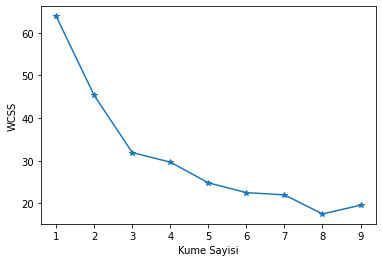

In [12]:
plt.plot(range(1,10),wcss_list,"-*")
plt.xlabel("Kume Sayisi")
plt.ylabel("WCSS")
plt.show()

### Sklearn İle KMeans

In [13]:
from sklearn.cluster import KMeans

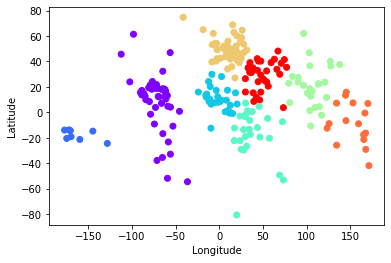

In [14]:
kmeans = KMeans(cluster_sayisi,init="random")
kmeans.fit(df)

plt.scatter(df["Longitude"],df["Latitude"],c=kmeans.predict(df),cmap="rainbow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [15]:
wcss_list = list()
for i in range(1,10):
    km = KMeans(i,init="random",n_init=1)
    km.fit(df)
    wcss_list.append(km.inertia_)

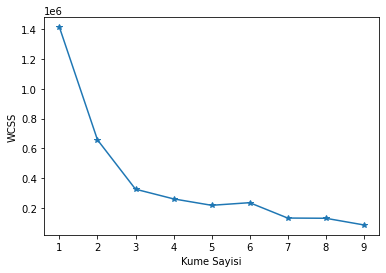

In [16]:
plt.plot(range(1,10),wcss_list,"-*")
plt.xlabel("Kume Sayisi")
plt.ylabel("WCSS")
plt.show()

### K-Means İmage Segmantation

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import cv2

In [126]:
img = cv2.imread("resim.png")
img = img.astype(np.float64)/255.
img_reshape = img.copy().reshape(-1,3)

renk_sayisi = 8
ornek_sayisi = int(img_reshape.shape[0]*0.01)

In [127]:
img_reshape.shape,ornek_sayisi

((90400, 3), 904)

In [128]:
kmeans = KMeans(renk_sayisi)
image_array_sample = shuffle(img_reshape, random_state=0)[:ornek_sayisi]
kmeans.fit(image_array_sample)

KMeans()

In [129]:
cikti = kmeans.predict(img_reshape)

In [130]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

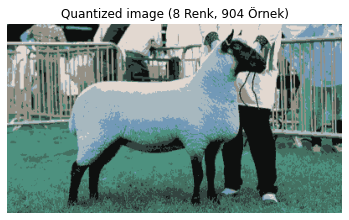

In [131]:
plt.axis('off')
plt.title(f'Quantized image ({renk_sayisi} Renk, {ornek_sayisi} Örnek)')
plt.imshow(recreate_image(kmeans.cluster_centers_, cikti, img.shape[0], img.shape[1]));